In [1]:
import cartopy.crs as ccrs
import cosima_cookbook as cc
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean as cm
from dask.distributed import Client
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Avoid the Runtime errors in true_divide encountered when trying to divide by zero
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

# matplotlib stuff:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0

In [2]:
from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:38179 Dashboard: /proxy/8787/status,Cluster Workers: 4 Cores: 16 Memory: 64.00 GiB


In [3]:
db = '/scratch/x77/db6174/access-om2/archive/databases/cc_database_nostress_param_2.db'
session = cc.database.create_session(db)
expt = ['025deg_jra55_ryf_param_kpp3', '025deg_jra55_ryf_nostress_param_kpp']
name = ['Control', 'No-stress']

In [4]:
start_time = '1990-01-01'
end_time = '1999-12-31'

In [5]:
tx_trans = cc.querying.getvar(expt[1], 'tx_trans', session, start_time = start_time, end_time = end_time).sel(
    time = slice(start_time, end_time))
ty_trans = cc.querying.getvar(expt[1], 'ty_trans', session, start_time = start_time, end_time = end_time).sel(
    time = slice(start_time, end_time))

In [6]:
tx_int_z = tx_trans.sum(dim = 'st_ocean', skipna = True)
tx_int_z = tx_int_z.where(tx_int_z != 0)
ty_int_z = ty_trans.sum(dim = 'st_ocean', skipna = True)
ty_int_z = ty_int_z.where(ty_int_z != 0)

## North Pacific

In [29]:
rho0 = 1026
x_min, x_max = -250, -100
y_min, y_max = 20, 75
ty_cont_NP = ty_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NP = ty_cont_NP.cumsum('xt_ocean').where(abs(ty_cont_NP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Total streamfunction - NP')

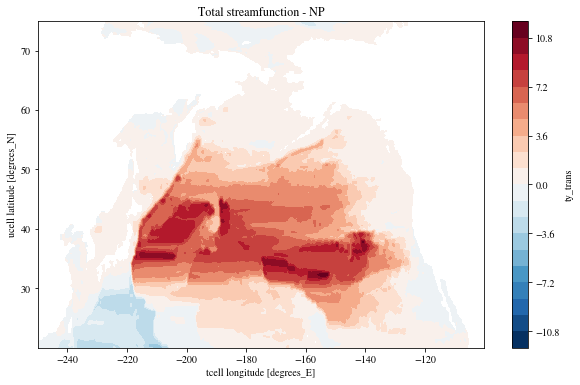

In [30]:
plt.figure(figsize = (10,6))
psi_cont_NP.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(levels = np.linspace(-12,12,21))
plt.title('Total streamfunction - NP')

In [32]:
ty_upper = ty_trans.sel(st_ocean = slice(0, 2000))
ty_lower = ty_trans.sel(st_ocean = slice(2000, 6000))

ty_upper_int_z = ty_upper.sum(dim = 'st_ocean', skipna = True)
ty_upper_int_z = ty_upper_int_z.where(ty_upper_int_z != 0)
ty_lower_int_z = ty_lower.sum(dim = 'st_ocean', skipna = True)
ty_lower_int_z = ty_lower_int_z.where(ty_lower_int_z != 0)

ty_upper_NP = ty_upper_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_upper_NP = ty_upper_NP.cumsum('xt_ocean').where(abs(ty_upper_NP<=1.e20))/(rho0*1.e6)

ty_lower_NP = ty_lower_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_lower_NP = ty_lower_NP.cumsum('xt_ocean').where(abs(ty_lower_NP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Streamfunction between 2000-6000 m depth')

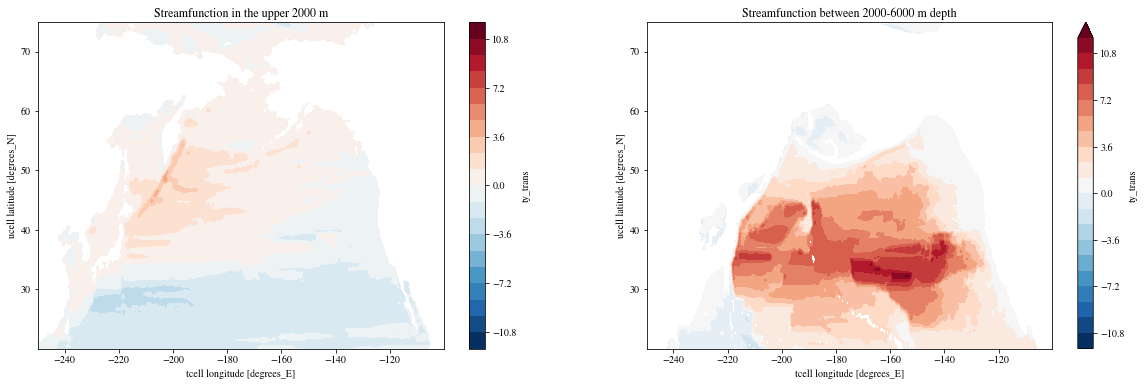

In [33]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

psi_upper_NP.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[0], levels = np.linspace(-12,12,21))
axes[0].set_title('Streamfunction in the upper 2000 m')

psi_lower_NP.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[1], levels = np.linspace(-12,12,21))
axes[1].set_title('Streamfunction between 2000-6000 m depth')

## North Atlantic

In [12]:
x_min, x_max = -100, 10
y_min, y_max = 20, 75
ty_cont_NA = ty_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_NA = ty_cont_NA.cumsum('xt_ocean').where(abs(ty_cont_NA<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Total streamfunction - NA')

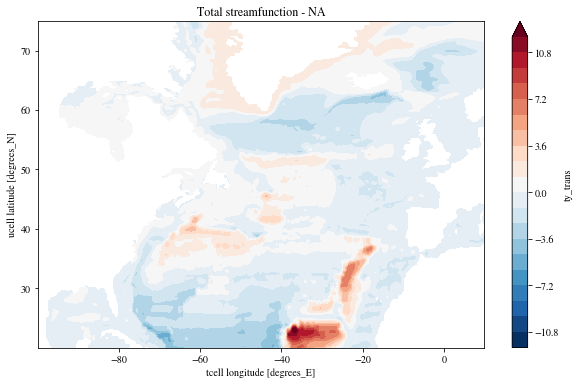

In [13]:
plt.figure(figsize = (10,6))
psi_cont_NA.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(levels = np.linspace(-12,12,21))
plt.title('Total streamfunction - NA')

In [14]:
ty_upper_NA = ty_upper_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_upper_NA = ty_upper_NA.cumsum('xt_ocean').where(abs(ty_upper_NA<=1.e20))/(rho0*1.e6)

ty_lower_NA = ty_lower_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_lower_NA = ty_lower_NA.cumsum('xt_ocean').where(abs(ty_lower_NA<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Streamfunction between 2000-6000 m depth')

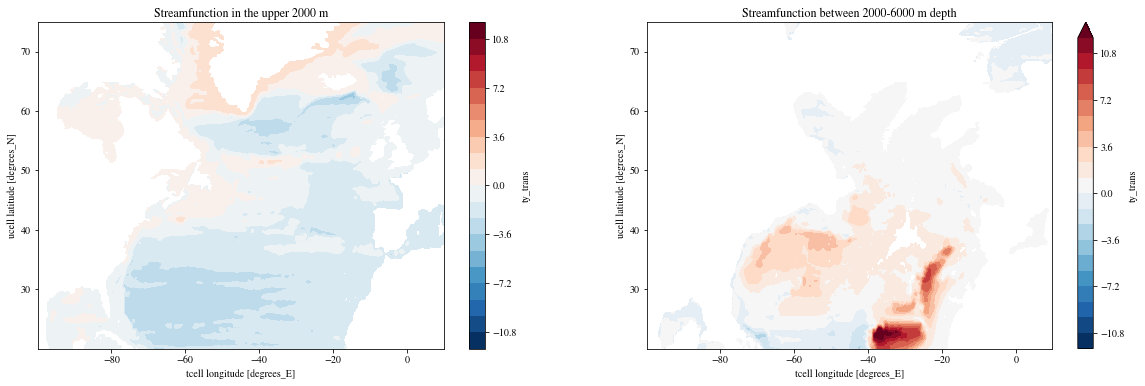

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

psi_upper_NA.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[0], levels = np.linspace(-12,12,21))
axes[0].set_title('Streamfunction in the upper 2000 m')

psi_lower_NA.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[1], levels = np.linspace(-12,12,21))
axes[1].set_title('Streamfunction between 2000-6000 m depth')

## Weddell Gyre

In [34]:
x_min, x_max = -70, 20
y_min, y_max = -80, -55
tx_cont_SA = tx_int_z.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_cont_SA = -tx_cont_SA.cumsum('yt_ocean').where(abs(tx_cont_SA<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Total streamfunction - Weddell gyre')

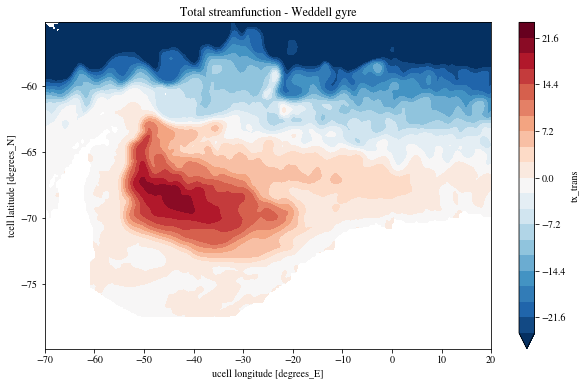

In [35]:
plt.figure(figsize = (10,6))
psi_cont_SA.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(levels = np.linspace(-24,24,21))
plt.title('Total streamfunction - Weddell gyre')

In [12]:
tx_upper = tx_trans.sel(st_ocean = slice(0, 2000))
tx_lower = tx_trans.sel(st_ocean = slice(2000, 6000))

tx_upper_int_z = tx_upper.sum(dim = 'st_ocean', skipna = True)
tx_upper_int_z = tx_upper_int_z.where(tx_upper_int_z != 0)
tx_lower_int_z = tx_lower.sum(dim = 'st_ocean', skipna = True)
tx_lower_int_z = tx_lower_int_z.where(tx_lower_int_z != 0)

tx_upper_SA = tx_upper_int_z.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_upper_SA = -tx_upper_SA.cumsum('yt_ocean').where(abs(tx_upper_SA<=1.e20))/(rho0*1.e6)

tx_lower_SA = tx_lower_int_z.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_lower_SA = -tx_lower_SA.cumsum('yt_ocean').where(abs(tx_lower_SA<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Streamfunction between 2000-6000 m depth')

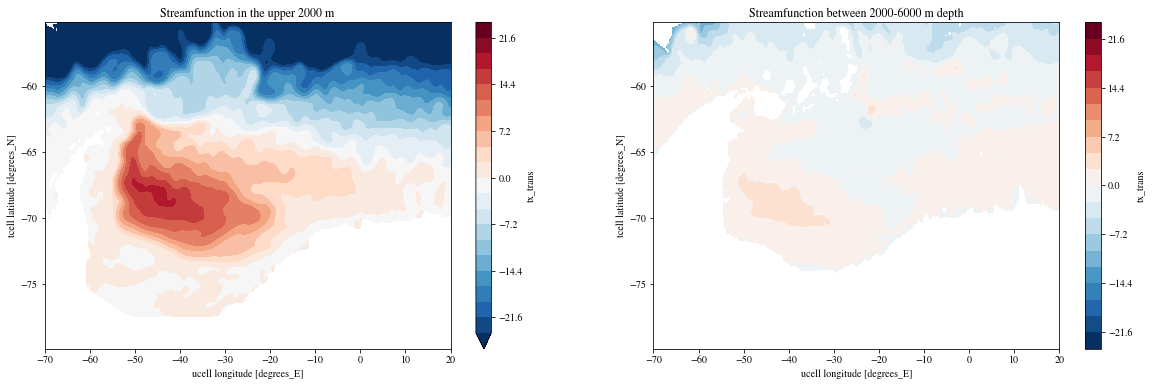

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

psi_upper_SA.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[0], levels = np.linspace(-24,24,21))
axes[0].set_title('Streamfunction in the upper 2000 m')

psi_lower_SA.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[1], levels = np.linspace(-24,24,21))
axes[1].set_title('Streamfunction between 2000-6000 m depth')

## Ross Gyre

In [36]:
x_min, x_max = -220, -100
y_min, y_max = -80, -60
tx_cont_SP = tx_int_z.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_cont_SP = -tx_cont_SP.cumsum('yt_ocean').where(abs(tx_cont_SP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Total streamfunction - Ross Gyre')

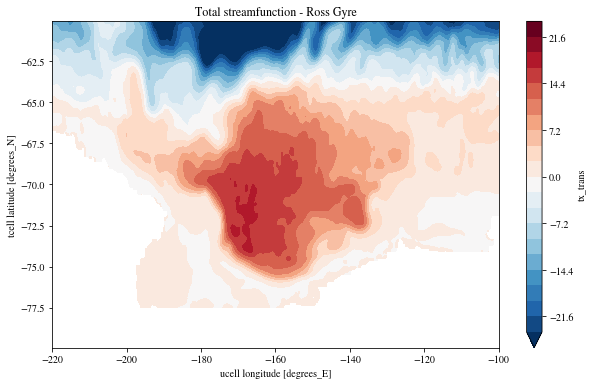

In [37]:
plt.figure(figsize = (10,6))
psi_cont_SP.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(levels = np.linspace(-24,24,21))
plt.title('Total streamfunction - Ross Gyre')

In [38]:
tx_upper_SP = tx_upper_int_z.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_upper_SP = -tx_upper_SP.cumsum('yt_ocean').where(abs(tx_upper_SP<=1.e20))/(rho0*1.e6)

tx_lower_SP = tx_lower_int_z.sel(xu_ocean = slice(x_min, x_max)).sel(yt_ocean = slice(y_min, y_max))
psi_lower_SP = -tx_lower_SP.cumsum('yt_ocean').where(abs(tx_lower_SP<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Streamfunction between 2000-6000 m depth')

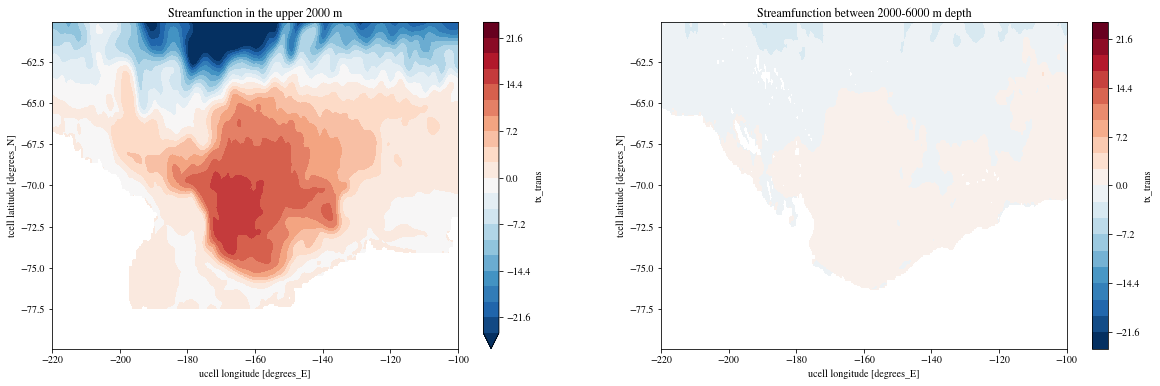

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

psi_upper_SP.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[0], levels = np.linspace(-24,24,21))
axes[0].set_title('Streamfunction in the upper 2000 m')

psi_lower_SP.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[1], levels = np.linspace(-24,24,21))
axes[1].set_title('Streamfunction between 2000-6000 m depth')

## South Pacific gyre

In [19]:
x_min, x_max = -216, -100
y_min, y_max = -35, -15
ty_cont_SP2 = ty_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SP2 = ty_cont_SP2.cumsum('xt_ocean').where(abs(ty_cont_SP2<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Total streamfunction - South Pacific')

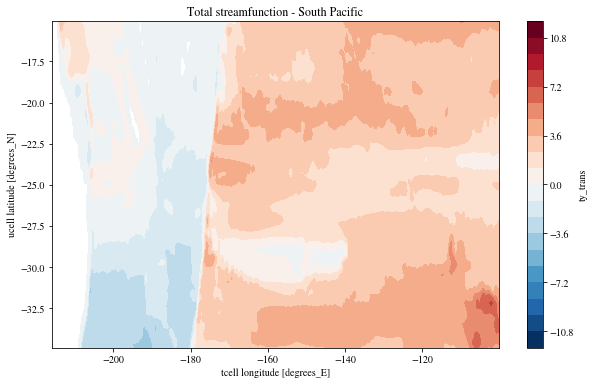

In [20]:
plt.figure(figsize = (10,6))
psi_cont_SP2.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(levels = np.linspace(-12,12,21))
plt.title('Total streamfunction - South Pacific')

In [23]:
ty_upper_SP2 = ty_upper_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_upper_SP2 = ty_upper_SP2.cumsum('xt_ocean').where(abs(ty_upper_SP2<=1.e20))/(rho0*1.e6)

ty_lower_SP2 = ty_lower_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_lower_SP2 = ty_lower_SP2.cumsum('xt_ocean').where(abs(ty_lower_SP2<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Streamfunction between 2000-6000 m depth')

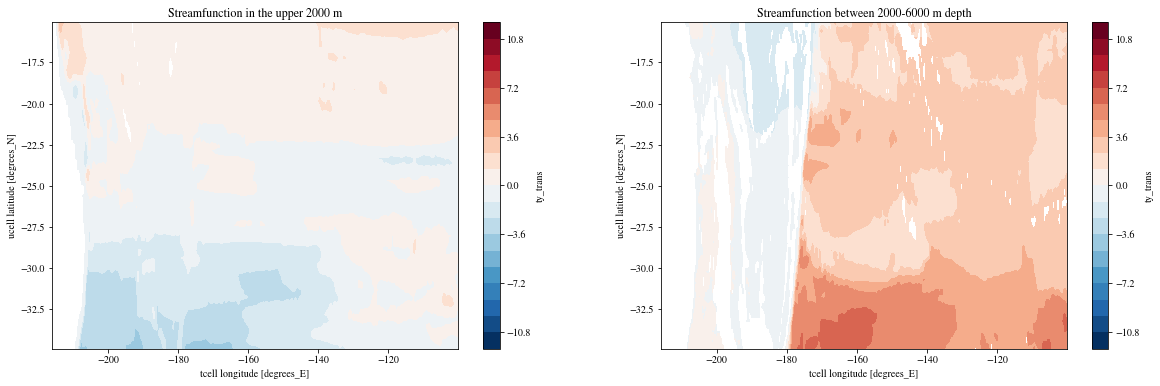

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

psi_upper_SP2.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[0], levels = np.linspace(-12,12,21))
axes[0].set_title('Streamfunction in the upper 2000 m')

psi_lower_SP2.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[1], levels = np.linspace(-12,12,21))
axes[1].set_title('Streamfunction between 2000-6000 m depth')

## South Atlantic gyre

In [25]:
x_min, x_max = -70, 20
y_min, y_max = -45, -20
ty_cont_SA2 = ty_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_cont_SA2 = ty_cont_SA2.cumsum('xt_ocean').where(abs(ty_cont_SA2<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Total streamfunction - South Atlantic')

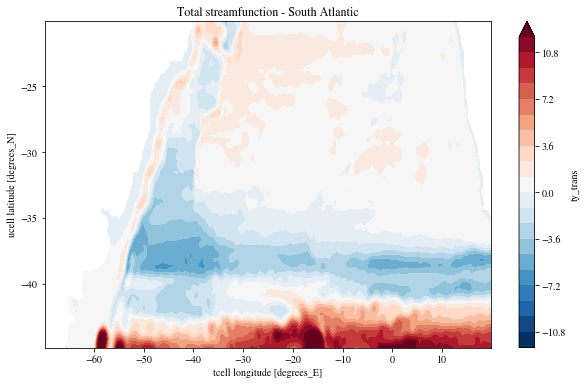

In [26]:
plt.figure(figsize = (10,6))
psi_cont_SA2.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(levels = np.linspace(-12,12,21))
plt.title('Total streamfunction - South Atlantic')

In [27]:
ty_upper_SA2 = ty_upper_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_upper_SA2 = ty_upper_SA2.cumsum('xt_ocean').where(abs(ty_upper_SA2<=1.e20))/(rho0*1.e6)

ty_lower_SA2 = ty_lower_int_z.sel(xt_ocean = slice(x_min, x_max)).sel(yu_ocean = slice(y_min, y_max))
psi_lower_SA2 = ty_lower_SA2.cumsum('xt_ocean').where(abs(ty_lower_SA2<=1.e20))/(rho0*1.e6)

Text(0.5, 1.0, 'Streamfunction between 2000-6000 m depth')

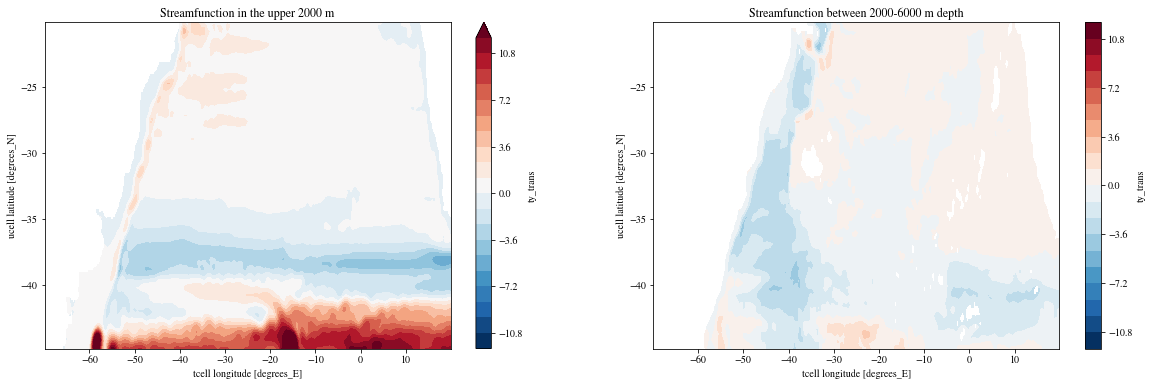

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

psi_upper_SA2.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[0], levels = np.linspace(-12,12,21))
axes[0].set_title('Streamfunction in the upper 2000 m')

psi_lower_SA2.sel(time = slice(start_time, end_time)).mean('time').plot.contourf(ax = axes[1], levels = np.linspace(-12,12,21))
axes[1].set_title('Streamfunction between 2000-6000 m depth')